In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as torch_data

In [3]:
A = np.random.normal(loc=0.3,scale=0.1,size=50000)
B = np.random.normal(loc=0.8,scale=0.04,size=50000)

data = np.hstack((A, B))
data = np.digitize(data, np.linspace(0.0, 1.0, 100))

CPU times: user 71.8 ms, sys: 3.89 ms, total: 75.7 ms
Wall time: 75.3 ms


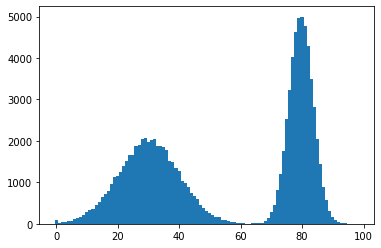

In [4]:
%%time
vals = plt.hist(data, bins=np.arange(100)-0.5)

## Binomial parameter fitting example

In [6]:
data = np.random.binomial(1, p=0.3, size=1000)
x = Variable(torch.from_numpy(data)).type(torch.FloatTensor)
p = Variable(torch.rand(1), requires_grad=True)

lr = 0.00002
for t in range(1000):
    NLL = -torch.sum(torch.log(x*p + (1-x)*(1-p)) )
    NLL.backward()

    #if t % 100 == 0:
    #    print("loglik  =", NLL.data.numpy(), "p =", p.data.numpy(), "dL/dp = ", p.grad.data.numpy())

    p.data -= lr * p.grad.data
    p.grad.data.zero_()

## Gaussian 

In [29]:

data = np.random.normal(10, 6, size=1000)
x = Variable(torch.from_numpy(data)).type(torch.FloatTensor)
mu = Variable(torch.rand(1), requires_grad=True)
logvar = Variable(torch.rand(1), requires_grad=True)

lr = 0.0002
epochs = 100000
for t in range(epochs):
    log_p = 0.5 * (logvar + (x - mu) ** 2 / logvar.exp())
    NLL = log_p.sum(-1)
    NLL.backward()

    if t % (epochs//10) == 0:
        print(mu, logvar.exp())

    mu.data -= lr * mu.grad.data
    logvar.data -= lr * logvar.grad.data
    mu.grad.data.zero_()
    logvar.grad.data.zero_()
    
print(mu, logvar.exp())

tensor([0.1701], requires_grad=True) tensor([1.0239], grad_fn=<ExpBackward>)
tensor([10.0012], requires_grad=True) tensor([36.5839], grad_fn=<ExpBackward>)
tensor([10.0012], requires_grad=True) tensor([36.5839], grad_fn=<ExpBackward>)
tensor([10.0012], requires_grad=True) tensor([36.5839], grad_fn=<ExpBackward>)
tensor([10.0012], requires_grad=True) tensor([36.5839], grad_fn=<ExpBackward>)
tensor([10.0012], requires_grad=True) tensor([36.5839], grad_fn=<ExpBackward>)
tensor([10.0012], requires_grad=True) tensor([36.5839], grad_fn=<ExpBackward>)
tensor([10.0012], requires_grad=True) tensor([36.5839], grad_fn=<ExpBackward>)
tensor([10.0012], requires_grad=True) tensor([36.5839], grad_fn=<ExpBackward>)
tensor([10.0012], requires_grad=True) tensor([36.5839], grad_fn=<ExpBackward>)
tensor([10.0012], requires_grad=True) tensor([36.5839], grad_fn=<ExpBackward>)


## Gaussian 

In [28]:
data = np.random.normal(10, 4, size=1000)
x = Variable(torch.from_numpy(data)).type(torch.FloatTensor)
mu = Variable(torch.rand(1), requires_grad=True)
var = Variable(torch.rand(1), requires_grad=True)

lr = 0.0005
epochs = 300000
for t in range(epochs):
    #NLL = - torch.mean(torch.log((x - mu)**2 / var))
    NLL = torch.mean((x - mu)**2 / var)
    NLL.backward()

    if t % (epochs//10) == 0:
        print(mu, var)
    #    print("loglik  =", NLL.data.numpy(), "mu =", mu.data.numpy(),
    #          "var =", var.data.numpy())

    mu.data -= lr * mu.grad.data
    var.data -= lr * var.grad.data
    mu.grad.data.zero_()
    var.grad.data.zero_()
    
print(mu, var)

tensor([0.1811], requires_grad=True) tensor([0.8447], requires_grad=True)
tensor([9.8275], requires_grad=True) tensor([10.5182], requires_grad=True)
tensor([10.0815], requires_grad=True) tensor([12.4405], requires_grad=True)
tensor([10.0957], requires_grad=True) tensor([13.9014], requires_grad=True)
tensor([10.0957], requires_grad=True) tensor([15.1067], requires_grad=True)
tensor([10.0957], requires_grad=True) tensor([16.1442], requires_grad=True)
tensor([10.0957], requires_grad=True) tensor([17.0643], requires_grad=True)
tensor([10.0957], requires_grad=True) tensor([17.8936], requires_grad=True)
tensor([10.0957], requires_grad=True) tensor([18.6538], requires_grad=True)
tensor([10.0957], requires_grad=True) tensor([19.3544], requires_grad=True)
tensor([10.0957], requires_grad=True) tensor([20.0072], requires_grad=True)


In [42]:
# logits = nn.Parameter(torch.zeros(1000))
# logits = logits.unsqueeze(0).repeat(x.shape[0], 1)
# F.cross_entropy(logits, x.long())
#F.cross_entropy(logits.unsqueeze(0).repeat(x.shape[0], 1), x.long())